<a href="https://colab.research.google.com/github/Noobmaster03/ML-based-Anaemia-Prediction-model/blob/main/ML_based_Anaemia_prediction_model_dummy_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install pandas scikit-learn matplotlib seaborn joblib



In [8]:
import pandas as pd
import numpy as np

# Generate synthetic anaemia dataset
np.random.seed(42)
n = 100  # number of patients

data = {
    "Age": np.random.randint(18, 60, n),
    "Gender": np.random.choice(["Male", "Female"], n),
    "Hemoglobin": np.random.normal(12, 2, n).round(1),
    "RBC": np.random.normal(4.7, 0.5, n).round(1),
    "MCV": np.random.normal(85, 10, n).round(1),
    "MCH": np.random.normal(28, 3, n).round(1),
    "Iron": np.random.normal(70, 15, n).round(1),
}

# Label: Anaemia (1 if Hemoglobin < 12, else 0)
data["Anaemia"] = [1 if hb < 12 else 0 for hb in data["Hemoglobin"]]

df = pd.DataFrame(data)
df.to_csv("anaemia_data.csv", index=False)
df.head()


,Age,Gender,Hemoglobin,RBC,MCV,MCH,Iron,Anaemia
0,56,Male,15.9,4.6,62.8,27.1,56.9,0
1,46,Female,11.7,4.9,98.9,24.5,66.6,1
2,32,Female,10.2,5.8,103.7,27.7,58.4,1
3,25,Female,10.4,5.5,101.9,32.6,78.6,1
4,38,Male,11.0,4.2,78.8,26.2,87.8,1


Best Parameters: {'max_depth': None, 'n_estimators': 50}
Accuracy: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.89      0.94         9

    accuracy                           0.95        20
   macro avg       0.96      0.94      0.95        20
weighted avg       0.95      0.95      0.95        20


Confusion Matrix:
 [[11  0]
 [ 1  8]]


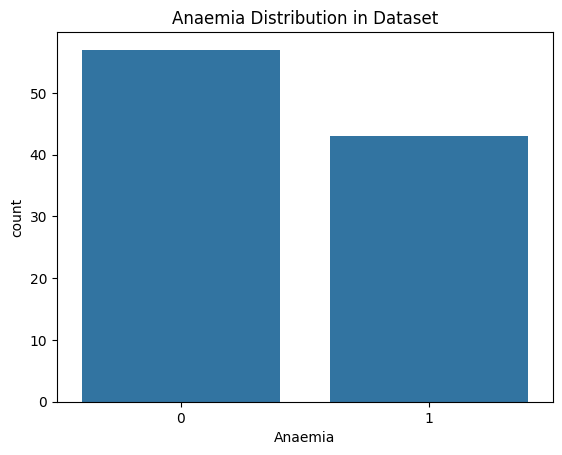

['scaler.joblib']

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# Step 1: Load dataset
df = pd.read_csv("anaemia_data.csv")

# Step 2: Encode categorical columns
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])  # Male=1, Female=0

# Step 3: Features & Target
X = df.drop(columns=["Anaemia"])
y = df["Anaemia"]

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 6: Model Training with Grid Search
rf = RandomForestClassifier(random_state=42)
param_grid = {"n_estimators": [50, 100], "max_depth": [None, 10, 20]}
grid = GridSearchCV(rf, param_grid, cv=3, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

# Step 7: Evaluation
y_pred = best_model.predict(X_test)
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualization
sns.countplot(x="Anaemia", data=df)
plt.title("Anaemia Distribution in Dataset")
plt.show()

# Save model
joblib.dump(best_model, "anaemia_model.joblib")
joblib.dump(scaler, "scaler.joblib")


In [10]:
import numpy as np

# Example: [Age, Gender(Male=1,Female=0), Hemoglobin, RBC, MCV, MCH, Iron]
patient = np.array([[25, 1, 10.5, 4.3, 76, 25, 55]])
patient_scaled = scaler.transform(patient)

prediction = best_model.predict(patient_scaled)[0]
print("Prediction:", "Anaemic" if prediction == 1 else "Normal")


Prediction: Anaemic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
